In [49]:
import math

def bucketsize(point, bucket_size):
    """return the lower value of the bucket in which the point is"""
    return bucket_size * math.floor(point / bucket_size)

In [50]:
from collections import Counter

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketsize(point, bucket_size) for point in points)

In [51]:
import matplotlib.pyplot as plt

def plot_histogram(points, bucket_size, title = ''):
    histogram = make_histogram(points, bucket_size)
    plt.bar(list(histogram.keys()), list(histogram.values()), width = bucket_size)
    plt.title(title)
    plt.show()

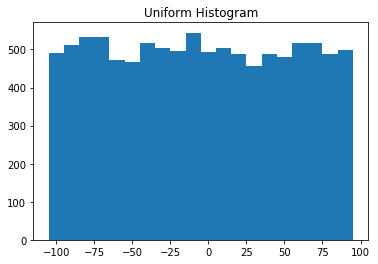

In [52]:
import random

random.seed(8)

uniform = [200 * random.random() - 100 for _ in range(10000)]

plot_histogram(uniform, 10, 'Uniform Histogram')

In [114]:
def inverse_normal_cdf(p, mu = 0, sigma = 1, tolerance = 0.00001):
    """inverse function of normal distribution"""
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p)
    
    lo_z, lo_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    
    while hi_z - lo_z > tolerance:
        mid_z = (hi_z + lo_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            lo_z = mid_z
        elif mid_p > p:
            hi_z = mid_z
        else:
            break
            
    return mid_z
    

In [113]:
def normal_cdf(x, mu = 0, sigma = 1):
    """cumulative density function of normal distribution"""
    return (1 + math.erf((x - mu)/sigma/2))/2

In [55]:
inverse_normal_cdf(0.5)

0.0

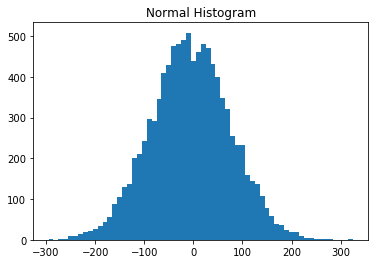

In [56]:
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]
plot_histogram(normal, 10, 'Normal Histogram')

## Two dimensions

In [115]:
import random

def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [116]:
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

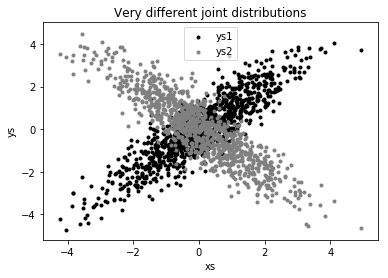

In [117]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys1, marker = '.', color = 'black', label = 'ys1')
plt.scatter(xs, ys2, marker = '.', color = 'gray', label = 'ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc = 9)
plt.title('Very different joint distributions')
plt.show()

In [118]:
def mean(x):
    return sum(x)/len(x)

In [119]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

In [120]:
def variance(x):
    """assumes that x has at least two elements"""
    n = len(x)
    if n <= 1:
        print('error')
        return
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [121]:
def sum_of_squares(x):
    """return the sum of the squares of the elements of x"""
    return sum([x_i ** 2 for x_i in x])

In [122]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

In [123]:
def dot(x, y):
    """return the dot production of x and y"""
    return sum([x_i * y_i for x_i, y_i in zip(x, y)])

In [124]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [125]:
def correlation(x, y):
    """return the correlation of x and y"""
    stdv_x = standard_deviation(x)
    stdv_y = standard_deviation(y)
    if stdv_x > 0 and stdv_y > 0:
        return covariance(x, y) / stdv_x / stdv_y
    else:
        return 0

In [126]:
print(correlation([4, 7], [3, 6]))

1.0000000000000002


## Many dimensions

In [127]:
def correlation_matrix(data):
    """returns the correlation matrix whose (i, j)-th element is the """
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    return make_matrix(num_columns, num_columns, matrix_entry)

In [128]:
def shape(matrix):
    """return the shape of the matrix"""
    return len(matrix), len(matrix[0])

In [129]:
data = [[2, 3, 4], [5, 6, 7]]

In [130]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a matrix whose (i, j)-th entry is entry_fn(x, y)"""
    return [[entry_fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

In [131]:
def is_diagonal(i, j):
    return 1 if i == j else 0

In [132]:
a = make_matrix(5, 5, is_diagonal)
print(identity_matrix)

NameError: name 'identity_matrix' is not defined

In [133]:
def get_column(matrix, j):
    """return the i-th column of the matrix data"""
    return [A_i[j] for A_i in matrix]

In [134]:
a

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [135]:
print(get_column(a, 1))

[0, 1, 0, 0, 0]


In [136]:
correlation_matrix(data)

[[1.0000000000000002, 1.0000000000000002, 1.0000000000000002],
 [1.0000000000000002, 1.0000000000000002, 1.0000000000000002],
 [1.0000000000000002, 1.0000000000000002, 1.0000000000000002]]

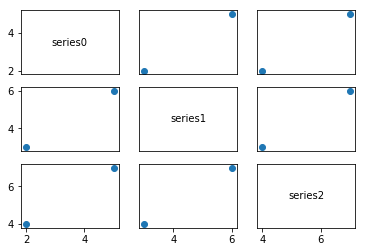

In [137]:
import matplotlib.pyplot as plt

_, num_columns = shape(data)
fig, ax = plt.subplots(num_columns, num_columns)

for i in range(num_columns):
    for j in range(num_columns):
        
        if i != j:
            ax[i][j].scatter(get_column(data, j), get_column(data, i))
        else:
            ax[i][j].annotate('series' + str(i), (0.5, 0.5), 
                             xycoords = 'axes fraction',
                             ha = 'center', va = 'center')
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
            
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

## Rescaling

In [138]:
import math

def distance(vector_1, vector_2):
    return math.sqrt(sum([(v1_i - v2_i) ** 2 for v1_i, v2_i in zip(vector_1, vector_2)]))

In [139]:
distance([63, 150], [67, 160])

10.770329614269007

In [140]:
def scale(data_matrix):
    num_rows, num_cols = shape(data_matrix)
    means = [mean(get_column(data_matrix, j)) for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data_matrix, j)) for j in range(num_cols)]
    return means, stdevs

In [141]:
def mean(vector):
    """return the mean value of vector"""
    n = len(vector)
    return sum([v_i for v_i in vector]) / n

In [142]:
def deviation(vector):
    vector_mean = mean(vector)
    n = len(vector)
    return math.sqrt(sum([(v_i - vector_mean) ** 2 for v_i in vector])/(n - 1))

In [143]:
def rescale(data_matrix):
    means, stdevs = scale(data_matrix)
    
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data_matrix[i][j] - means[j]) / stdevs[j]
        else:
            return data_matrix[i][j]
    
    num_rows, num_cols = shape(data_matrix)
    return make_matrix(num_rows, num_cols, rescaled)

In [144]:
def make_matrix(num_rows, num_cols, fn_entry):
    return [[fn_entry(i, j) for i in range(num_rows)]
           for j in range(num_cols)]

In [145]:
b = rescale(a)

In [146]:
b

[[1.7888543819998315,
  -0.44721359549995787,
  -0.44721359549995787,
  -0.44721359549995787,
  -0.44721359549995787],
 [-0.44721359549995787,
  1.7888543819998315,
  -0.44721359549995787,
  -0.44721359549995787,
  -0.44721359549995787],
 [-0.44721359549995787,
  -0.44721359549995787,
  1.7888543819998315,
  -0.44721359549995787,
  -0.44721359549995787],
 [-0.4472135954999579,
  -0.4472135954999579,
  -0.4472135954999579,
  1.7888543819998317,
  -0.4472135954999579],
 [-0.4472135954999579,
  -0.4472135954999579,
  -0.4472135954999579,
  -0.4472135954999579,
  1.7888543819998317]]

## Principal component analysis

In [147]:
def de_mean_matrix(A):
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [148]:
c = de_mean_matrix(a)

In [149]:
c

[[0.8, -0.2, -0.2, -0.2, -0.2],
 [-0.2, 0.8, -0.2, -0.2, -0.2],
 [-0.2, -0.2, 0.8, -0.2, -0.2],
 [-0.2, -0.2, -0.2, 0.8, -0.2],
 [-0.2, -0.2, -0.2, -0.2, 0.8]]

Define the function to nomarlize the direction

In [150]:
import math

def magnitude(v):
    """define the magnitude function which is the l_2 norm"""
    return math.sqrt(sum([v_i ** 2 for v_i in v]))

In [151]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [152]:
print(direction([1, 4]))

[0.24253562503633297, 0.9701425001453319]


In [153]:
def dot(v, w):
    """the dot function of the vectors v and w"""
    return sum([v_i * w_i for v_i, w_i in zip(v, w)])

In [154]:
def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction determined by w"""
    return dot(x_i, direction(w)) ** 2
    

In [155]:
def directional_variance(X, w):
    return sum(dot(x_i, direction(w)) for x_i in X)

In [156]:
sum(2 * i for i in range(5))

20

In [157]:
def vector_add(v, w):
    """return the list of the element-addition of v and w"""
    return [v_i + w_i for v_i, w_i in zip(v, w)]

In [158]:
def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

In [159]:
vector_sum([[1, 2], [3, 4], [5, 6]])

[9, 12]

In [160]:
def directional_variance_gradient_i(x_i, w):
    """the gradient of directional variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

In [161]:
def directional_variance_gradient(X, w):
    return vector_sum([directional_variance_gradient_i(x_i, w) for x_i in X])

In [162]:
from functools import partial

a = partial(directional_variance_gradient, [[1, 2], [3, 4]])

In [163]:
a([1, 2])

[33.988233257996804, 48.299068313995456]

## Using the gradient

In [164]:
def sum_of_squares(v):
    """return the sum_of_squares of vector v"""
    return sum(v_i ** 2 for v_i in v)

In [165]:
def sum_of_squares_gradient(v):
    """return the gradient of the sum_of_squares"""
    return [2 * v_i for v_i in v]

In [166]:
def step(v, direction, step_size):
    """move one step in the direction from v with step_size
    step_size also consider the positive or negative value of direction"""
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

In [167]:
import math

def distance(v, w):
    return math.sqrt(sum((v_i - w_i) ** 2 for v_i, w_i in zip(v, w)))

In [168]:
import random

v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v   # continue if distance is bigger than the tol
    

In [169]:
v

[3.2129144872673417e-06, -2.8113001763589246e-06, 2.409685865450507e-06]

## Choosing the right step size

In [170]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [171]:
def square(x):
    return [x_i ** 2 for x_i in x]

In [172]:
def negate(f):
    """return a function that takes input x and return -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

In [173]:
def negate_all(f):
    """return a list"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

In [174]:
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.00001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance
                         )

In [175]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [1, 1, 1])

[0.0030223145490365735, 0.0030223145490365735, 0.0030223145490365735]

In [176]:
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer = maximize_batch(
    partial(directional_variance, X),
    partial(directional_variance_gradient, X),
    guess)
    return direction(unscaled_maximizer)
    

In [177]:
tt = [[1, 2], [3, 4]]
a = partial(directional_variance_gradient, tt)
a([1, 2])

[33.988233257996804, 48.299068313995456]

In [178]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.00001):
    """using gradient descent method"""
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]
        
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
        

In [179]:
tt = [[1, 2], [3, 4]]
unscaled_maximizer = minimize_batch(
    partial(directional_variance, tt),
    partial(directional_variance_gradient, tt),
    [1, 1])

In [240]:
import random

def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

In [241]:
xs = [random_normal() for _ in range(20)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

[0.6867501605445069, 0.7268935389670855]


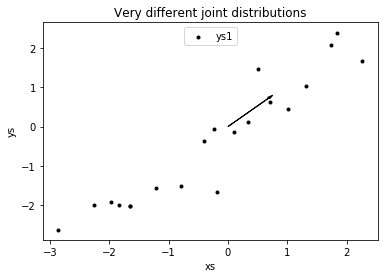

In [242]:
import matplotlib.pyplot as plt
from functools import partial

data = list(zip(xs, ys1))
arr_x, arr_y = first_principal_component(data)
print([arr_x, arr_y])

ax = plt.axes()
ax.scatter(xs, ys1, marker = '.', color = 'black', label = 'ys1')
ax.arrow(0, 0, arr_x, arr_y, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc = 9)
plt.title('Very different joint distributions')
plt.show()

In [183]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [198]:
def scalar_multiply(scalar, w):
    return [scalar * w_i for w_i in w]

In [199]:
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]

In [200]:
def project(v, w):
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [201]:
def remove_projection_from_vector(v, w):
    """remove the perpendicular component of v on the direction w"""
    return vector_subtract(v, project(v, w))

In [202]:
def remove_projection(X, w):
    return [remove_projection_from_vector(x_i, w) for x_i in X]

In [203]:
arr = [arr_x, arr_y]

In [204]:
rp = remove_projection(data, arr)

In [213]:
def get_column(X, j):
    return [x_i[j] for x_i in X ]

In [218]:
len(get_column(rp, 1))

200

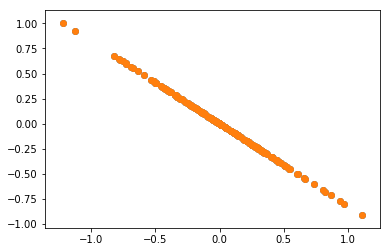

In [221]:
import matplotlib.pyplot as plt

plt.scatter(get_column(rp, 0), get_column(rp, 1))
plt.show()

In [222]:
def principal_component_analysis(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)
        
    return components

In [223]:
def transform_vector(v, components):
    return [dot(v, w) for w in components]

def transform(X, components):
    return [transform_vector(x_i, components) for x_i in X]

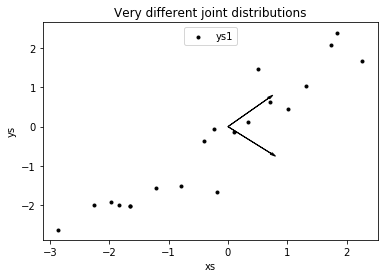

In [243]:
import matplotlib.pyplot as plt
from functools import partial

data = list(zip(xs, ys1))
components = principal_component_analysis(data, 2)

ax = plt.axes()
ax.scatter(xs, ys1, marker = '.', color = 'black', label = 'ys1')
ax.arrow(0, 0, components[0][0], components[0][1], head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, components[1][0], components[1][1], head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc = 9)
plt.title('Very different joint distributions')
plt.show()